In [1]:
from math import sqrt, factorial, isnan
import warnings
import numpy as np
from sympy.utilities.iterables import multiset_permutations
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it
import timeit
import Classification as CL
import os
import time
way = os.getcwd() + "/Data_npy/"
way1 = way + "Chosen ones/"

In [2]:
os.listdir(way1)

['No100.npy',
 'No100_info.npy',
 'No101.npy',
 'No101_info.npy',
 'No104.npy',
 'No104_info.npy',
 'No105.npy',
 'No105_info.npy',
 'No106.npy',
 'No106_info.npy',
 'No108.npy',
 'No108_info.npy',
 'No11.npy',
 'No110.npy',
 'No110_info.npy',
 'No111.npy',
 'No111_info.npy',
 'No114.npy',
 'No114_info.npy',
 'No116.npy',
 'No116_info.npy',
 'No117.npy',
 'No117_info.npy',
 'No118.npy',
 'No118_info.npy',
 'No119.npy',
 'No119_info.npy',
 'No120.npy',
 'No120_info.npy',
 'No126.npy',
 'No126_info.npy',
 'No127.npy',
 'No127_info.npy',
 'No128.npy',
 'No128_info.npy',
 'No130.npy',
 'No130_info.npy',
 'No132.npy',
 'No132_info.npy',
 'No133.npy',
 'No133_info.npy',
 'No137.npy',
 'No137_info.npy',
 'No138.npy',
 'No138_info.npy',
 'No140.npy',
 'No140_info.npy',
 'No141.npy',
 'No141_info.npy',
 'No146.npy',
 'No146_info.npy',
 'No154.npy',
 'No154_info.npy',
 'No160.npy',
 'No160_info.npy',
 'No164.npy',
 'No164_info.npy',
 'No165.npy',
 'No165_info.npy',
 'No170.npy',
 'No170_info.npy

In [3]:
train_data = [np.load(way1 + "No100.npy"),np.load(way1 + "No101.npy"), np.load(way1 + "No108.npy"), np.load(way1 + "No324.npy") ]
test_data = [np.load(way1 + "No106.npy")]
print("done")

done


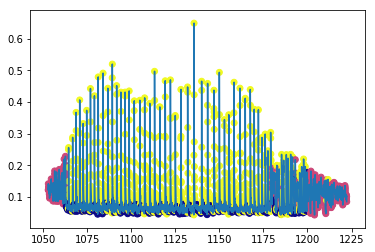

In [4]:
plt.plot(test_data[0][0], test_data[0][1])
plt.scatter(test_data[0][0], test_data[0][1], c = test_data[0][2], cmap = plt.cm.plasma)
plt.show()

In [5]:
st = time.time()
#HMM = GaussianHMM(2) # zavedu co potřebuju
G_HMM = GaussianHMM(3,covariance_type = "full", algorithm = "viterbi")
#validace = CL.validuj(GaussianHMM(3), train_data[1], train_data[1], Labely, range(2,11)) #[0,0,1,1,1]
[validace, stavy, casf, casp] = CL.validuj(G_HMM, train_data, test_data, 10, [0,0,1,1,0], True)
ko = time.time()
print(ko-st)

9.288074016571045


In [6]:
casf

0.28209519386291504

In [10]:
validace.head()

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 0, 1, 1, 0)",10,0.757603,821,0.877845,0.727926,0.571763,0.725845,0.825196,0.576423,0.97992,0.937671,0.987465,0.403639
1,0,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


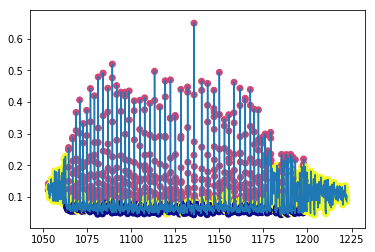

In [11]:
plt.figure("p.1")
plt.plot(test_data[0][0], test_data[0][1])
plt.scatter(test_data[0][0], test_data[0][1], c = stavy, cmap = plt.cm.plasma)
plt.show()

In [12]:
stavy

array([1, 1, 1, ..., 2, 2, 2])

In [13]:
trlist = np.load(way + "seznam.npy").tolist()

In [14]:
trlist

['No104.npy',
 'No105.npy',
 'No106.npy',
 'No108.npy',
 'No110.npy',
 'No111.npy',
 'No116.npy',
 'No117.npy',
 'No118.npy',
 'No119.npy']

In [15]:
del train_data,test_data
train_data = []
test_data = []
for data in trlist:
    train_data.append(np.load(way1 + data))

test_data.append(np.load(way1 + "No11.npy"))    
train_data


[array([[  1.05168050e+03,   1.05173050e+03,   1.05178050e+03, ...,
           1.23133050e+03,   1.23138050e+03,   1.23143050e+03],
        [  1.36690834e-01,   1.31738837e-01,   1.56498822e-01, ...,
           1.41800037e-01,   1.24271541e-01,   1.07450472e-01],
        [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00]]),
 array([[  1.05636050e+03,   1.05641050e+03,   1.05646050e+03, ...,
           1.21561050e+03,   1.21566050e+03,   1.21571050e+03],
        [  1.07922091e-01,   1.06035616e-01,   1.29302141e-01, ...,
           1.30638394e-01,   1.38027087e-01,   1.07293266e-01],
        [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00]]),
 array([[  1.05295050e+03,   1.05300050e+03,   1.05305050e+03, ...,
           1.22215050e+03,   1.22220050e+03,   1.22225050e+03],
        [  1.22070653e-01,   1.41800037e-01,   1.24192937e-01, ...,
    

In [16]:
test_data

[array([[  1.05000050e+03,   1.05005050e+03,   1.05010050e+03, ...,
           1.19985050e+03,   1.19990050e+03,   1.19995050e+03],
        [  2.46342194e-01,   2.45398956e-01,   2.51687206e-01, ...,
           4.81758553e-01,   5.12570978e-01,   5.55331078e-01],
        [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00]])]

In [1]:
#validace = CL.validuj(G_HMM, train_data, test_data, range(2,20), unsupervised = True)

NameError: name 'CL' is not defined

In [16]:
#validace.to_csv('prvni_Validace.csv',index=False)

In [20]:
validace = pd.read_csv(os.getcwd()+"/prvni_Validace.csv")

In [21]:
validace.head()

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 0, 0, 0, 1)",2,0.750000,750,0.918151,0.581290,0.296296,0.598579,0.859352,0.472674,0.598425,0.985588,0.754717,0.196891
1,"(0, 0, 0, 1, 0)",2,0.703667,889,0.882223,0.000000,0.420146,0.434123,0.792753,0.000000,0.430122,0.994457,0.000000,0.410622
2,"(0, 0, 0, 1, 1)",2,0.762000,714,0.912290,0.637218,0.311637,0.620382,0.844665,0.529687,0.652893,0.991685,0.799528,0.204663
3,"(0, 0, 1, 0, 0)",2,0.704667,886,0.882874,0.000000,0.423280,0.435385,0.793805,0.000000,0.432432,0.994457,0.000000,0.414508
4,"(0, 0, 1, 0, 1)",2,0.762000,714,0.912988,0.635426,0.311637,0.620017,0.845863,0.527216,0.652893,0.991685,0.799528,0.204663


In [22]:
Sorted = validace.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
200,"(0, 1, 1, 1, 1)",8,0.869333,392,0.961210,0.726786,0.729317,0.805771,0.954123,0.584770,0.959831,0.968404,0.959906,0.588083
188,"(0, 0, 0, 1, 1)",8,0.866667,400,0.944280,0.772388,0.712284,0.809651,0.917844,0.638889,0.979592,0.972284,0.976415,0.559585
190,"(0, 0, 1, 0, 1)",8,0.866333,401,0.944594,0.773532,0.708023,0.808716,0.917450,0.639445,0.979405,0.973392,0.978774,0.554404
219,"(0, 0, 0, 1, 1)",9,0.866000,402,0.944899,0.754338,0.731235,0.810157,0.930183,0.615499,0.970021,0.960089,0.974057,0.586788
250,"(0, 0, 0, 1, 1)",10,0.864667,406,0.941079,0.740807,0.755906,0.812597,0.939260,0.597685,0.963855,0.942905,0.974057,0.621762
169,"(0, 1, 1, 1, 1)",7,0.863667,409,0.958129,0.731085,0.698776,0.795997,0.940235,0.595840,0.944812,0.976718,0.945755,0.554404
221,"(0, 0, 1, 0, 1)",9,0.863333,410,0.945217,0.749321,0.721044,0.805194,0.929759,0.607930,0.973568,0.961197,0.976415,0.572539
157,"(0, 0, 0, 1, 1)",7,0.862333,413,0.939862,0.786325,0.684609,0.803598,0.903787,0.658188,0.976019,0.978936,0.976415,0.527202
231,"(0, 1, 1, 1, 1)",9,0.861667,415,0.958147,0.697232,0.738095,0.797825,0.964607,0.550546,0.952869,0.951774,0.950472,0.602332
192,"(0, 0, 1, 1, 1)",8,0.861000,417,0.945682,0.744526,0.710311,0.800173,0.927050,0.607143,0.964444,0.965078,0.962264,0.562176


In [17]:
st = time.time()
#HMM = GaussianHMM(2) # zavedu co potřebuju
G_HMM = GaussianHMM(3,covariance_type = "full", algorithm = "viterbi")
#validace = CL.validuj(GaussianHMM(3), train_data[1], train_data[1], Labely, range(2,11)) #[0,0,1,1,1]
[validace, stavy, casf, casp] = CL.validuj(G_HMM, train_data, test_data, 10, [0,0,1,1,0], True)
ko = time.time()
print(ko-st)

22.491228818893433


In [18]:
casf


0.9072728157043457

In [19]:
casp

0.0016949176788330078